<a href="https://colab.research.google.com/github/mtalha10/Analyzing-Olympics-Data-with-SQL-and-Python/blob/main/Heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart failure prediction




## Data Exploration

 ### Import Libraries and load data

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from statsmodels import robust
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron


## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [115]:
# Load CSV data
df = pd.read_csv('/data1.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [116]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [117]:
df['DEATH_EVENT'].value_counts() #count the outcomes as death event
#df.isnull().sum()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

## Exploratory Data Analysis & Descriptive Statistics

In [118]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### Correlation Matrix
Its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.
- Lighter shades represents positive correlation
- Darker shades represents negative correlation

Text(0.5, 1.0, 'Correlation Plot of the Heart Failure Prediction')

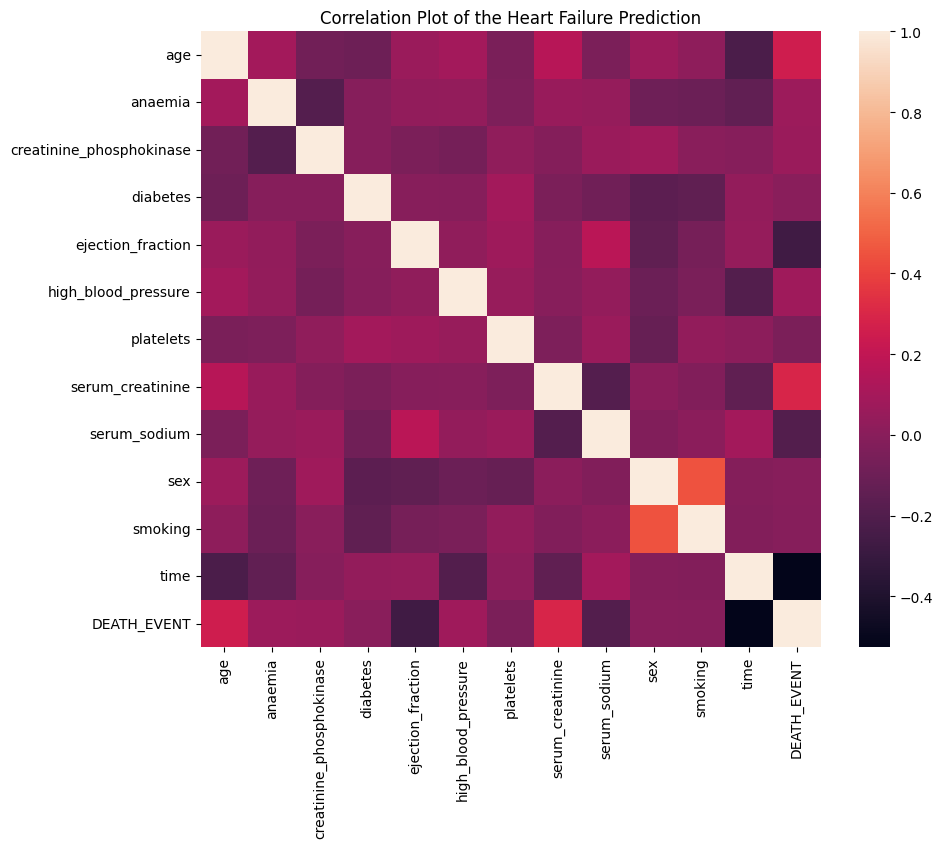

In [119]:
plt.figure(figsize=(10,8))
plot= sns.heatmap(df.corr())
plt.title("Correlation Plot of the Heart Failure Prediction")

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

In [120]:
# Shows the Distribution of Heart Diseases with respect to male and female

fig = px.histogram(df, x="DEATH_EVENT", color="sex", barmode="group",
             title='Distribution of Heart Diseases by Gender',
             hover_data=df.columns)
fig.show()

### Use one hot encoding
  - Median Absolute Deviation (MAD) normalization

when your data contains outliers, normalizing can be challenging since the outliers can have a significant impact on the mean and standard deviation of the data. One approach to handling this is to use robust normalization techniques that are less sensitive to outliers. One such technique is the Median Absolute Deviation (MAD) normalization, which scales the data based on the median and the median absolute deviation of the data, rather than the mean and standard deviation.

In [121]:
#calculate MAD for all columns
selected_columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Calculate the MAD for each selected column
mad_values = df[selected_columns].mad()

# Display the MAD values
print("MAD values:\n", mad_values)


MAD values:
 age                             9.527923
anaemia                         0.490599
creatinine_phosphokinase      513.142605
ejection_fraction               8.951287
platelets                   66909.447618
serum_creatinine                0.574821
serum_sodium                    3.210255
time                           68.115748
dtype: float64


In [122]:
mad_values = df

scaler = MinMaxScaler()

cols_to_normalize = ['creatinine_phosphokinase', 'platelets']

df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

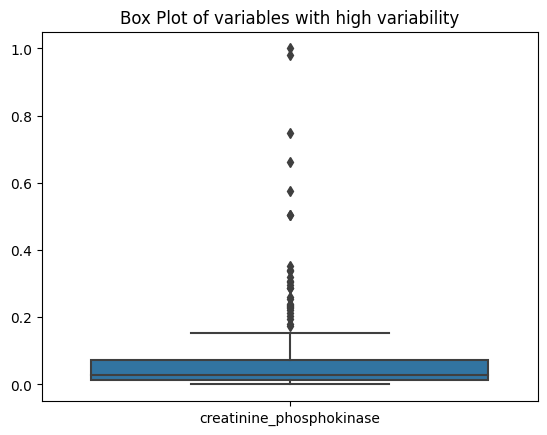

In [123]:
sns.boxplot(data=df[["creatinine_phosphokinase"]])
plt.title('Box Plot of variables with high variability', loc="center")
# Add a legend for the units of each variable
plt.gca().set_facecolor('none') # para tirar a linhas cizentas

In [124]:
#Convert variables from float to interger

# converting 'Weight' from float to int
df['serum_creatinine'] = df['serum_creatinine'].astype(int)
df['age'] = df['age'].astype(int)
df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].astype(int)
df['platelets'] = df['platelets'].astype(int)

# displaying the datatypes
df.dtypes

age                         int64
anaemia                     int64
creatinine_phosphokinase    int64
diabetes                    int64
ejection_fraction           int64
high_blood_pressure         int64
platelets                   int64
serum_creatinine            int64
serum_sodium                int64
sex                         int64
smoking                     int64
time                        int64
DEATH_EVENT                 int64
dtype: object

In [125]:
## split the data into independent and dependent variable
X = df.iloc[:, :-1].values #all variables in dataset except DEATH_EVENT
y = df.iloc[:, -1].values #variable DEATH_EVENT

In [126]:
df.iloc[:, :-1]


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,0,0,20,1,0,1,130,1,0,4
1,55,0,1,0,38,0,0,1,136,1,0,6
2,65,0,0,0,20,0,0,1,129,1,1,7
3,50,1,0,0,20,0,0,1,137,1,0,7
4,65,1,0,1,20,0,0,2,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,0,1,38,1,0,1,143,1,1,270
295,55,0,0,0,38,0,0,1,139,0,0,271
296,45,0,0,1,60,0,0,0,138,0,0,278
297,45,0,0,0,38,0,0,1,140,1,1,280


In [127]:
df.iloc[:, -1]


0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [128]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)

In [129]:
#Multi LAYER Preceptron

## Neural Network
## initialise the NN

model = Sequential()

This code is defining and compiling a neural network using Keras

This code sets up a simple feedforward neural network for a binary classification task with one input layer, one hidden layer, dropout for regularization, and one output layer. The model is then compiled with a binary crossentropy loss function and the Adam optimizer.

In [130]:
##set up the layers
## input layer
model.add(Dense(units= 125, kernel_initializer= 'uniform', activation = 'relu', input_dim = 12))
## hidden layer
model.add(Dense(units= 125, kernel_initializer= 'uniform', activation = 'relu'))
##regularization
model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN
#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile( loss ='binary_crossentropy', metrics = ['accuracy'], optimizer= 'adam')

In [131]:
## train the model
history = model.fit(X_train, y_train, batch_size = 32, epochs = 40, validation_split= 0.30)

Epoch 1/40
6/6 [==============================] - 1s 27ms/step - loss: 0.6330 - accuracy: 0.5808 - val_loss: 0.4735 - val_accuracy: 0.7639
Epoch 2/40
6/6 [==============================] - 0s 9ms/step - loss: 0.5163 - accuracy: 0.7844 - val_loss: 0.4817 - val_accuracy: 0.7917
Epoch 3/40
6/6 [==============================] - 0s 6ms/step - loss: 0.4670 - accuracy: 0.8383 - val_loss: 0.4294 - val_accuracy: 0.8333
Epoch 4/40
6/6 [==============================] - 0s 6ms/step - loss: 0.4614 - accuracy: 0.8563 - val_loss: 0.4215 - val_accuracy: 0.8472
Epoch 5/40
6/6 [==============================] - 0s 9ms/step - loss: 0.4380 - accuracy: 0.8443 - val_loss: 0.4261 - val_accuracy: 0.8056
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 0.4283 - accuracy: 0.8443 - val_loss: 0.4026 - val_accuracy: 0.8472
Epoch 7/40
6/6 [==============================] - 0s 7ms/step - loss: 0.4031 - accuracy: 0.8623 - val_loss: 0.3939 - val_accuracy: 0.8472
Epoch 8/40
6/6 [=================

In [132]:
# Plot train loss and validation loss
def plot_loss (history):
    fig, ax = plt.subplots(figsize = (15,6))
    ax.plot(history.history['loss'],color="#004C99")
    ax.plot(history.history['val_loss'],color="#D96552")
    #ax.set_facecolor("#D3D3D3")
    plt.grid(b=False,axis = 'y')
    ax.grid(b=False,axis = 'y')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right',prop={'size': 15})

ValueError: ignored

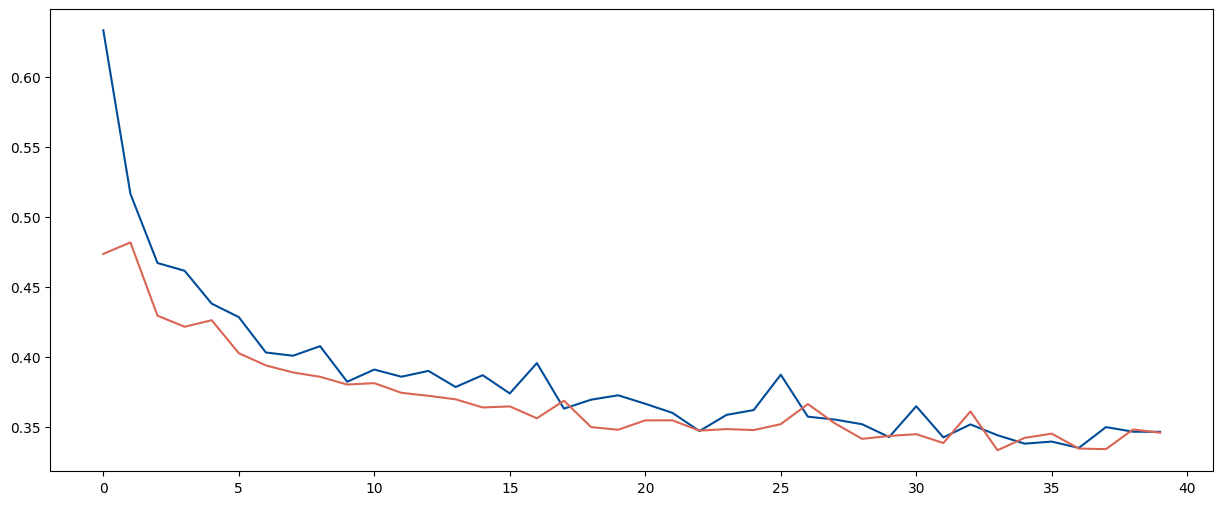

In [134]:
plot_loss (history)

In [135]:
## make prediction
y_pred_hf = model.predict(X_test)
y_pred_hf = np.where(y_pred_hf > 0.5, 1, 0) # on binary put between 0 and 1, othrwise it will predict a float numb

2/2 [==============================] - 0s 3ms/step


In [136]:
print(y_test.shape)
print(y_pred_hf.shape)

(60,)
(60, 1)


In [137]:
y_pred_hf = y_pred_hf.flatten()

In [138]:
print(y_test.shape)
print(y_pred_hf.shape)

(60,)
(60,)


In [139]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_hf})


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [140]:
##classification report
print(classification_report(y_test, y_pred_hf))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



In [141]:
cm = confusion_matrix(y_test, y_pred_hf)
cm

array([[37,  4],
       [ 5, 14]])

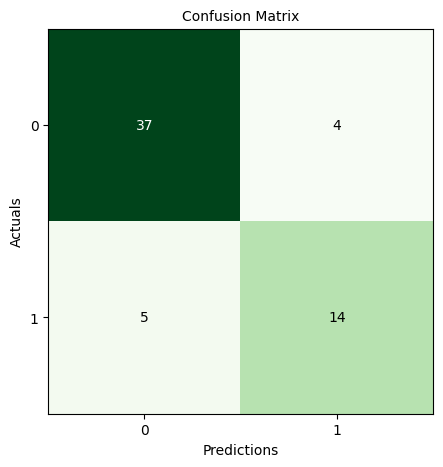

In [142]:
## plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [143]:
auc = roc_auc_score(y_test, y_pred_hf)
print('AUC: %f' %auc)

AUC: 0.819641


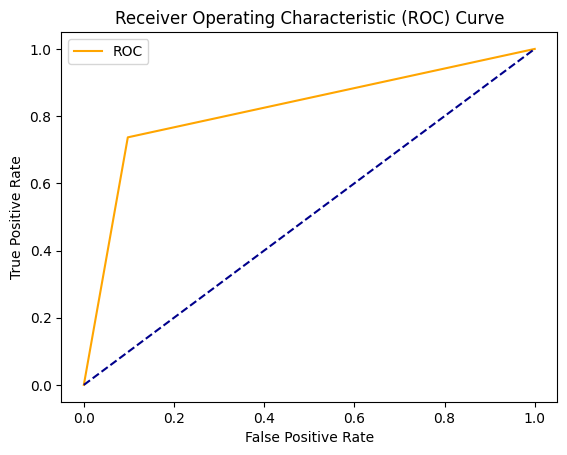

In [144]:
fpr, tpr = roc_curve(y_test, y_pred_hf)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [145]:
##save the model
model.save('mortality_heart_failure_model')

In [147]:
##save the NN Model
import pickle # file that contains binary representation

##save the model to a file
with open ('neural_network_model.pkl','wb') as file:
    pickle.dump(history, file)

In [149]:
#convert text to numerical values
word_to_index = {word: index for index, word in enumerate(df.columns[:-1])}
word_to_index

{'age': 0,
 'anaemia': 1,
 'creatinine_phosphokinase': 2,
 'diabetes': 3,
 'ejection_fraction': 4,
 'high_blood_pressure': 5,
 'platelets': 6,
 'serum_creatinine': 7,
 'serum_sodium': 8,
 'sex': 9,
 'smoking': 10,
 'time': 11}